In [ ]:
## part1

In [43]:


coordination_source = """
{name:'兰州', geoCoord:[103.7333, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [18]:
import re
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "":continue
            
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location

city_info = get_city_info(coordination_source)

city_info


{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [82]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def get_city_distance(city1, city2):
    return geo_distance(city_info[city1], city_info[city2])


city_info {'兰州': (103.73, 36.03), '嘉峪关': (98.17, 39.47), '西宁': (101.74, 36.56), '成都': (104.06, 30.67), '石家庄': (114.48, 38.03), '拉萨': (102.73, 25.04), '贵阳': (106.71, 26.57), '武汉': (114.31, 30.52), '郑州': (113.65, 34.76), '济南': (117.0, 36.65), '南京': (118.78, 32.04), '合肥': (117.27, 31.86), '杭州': (120.19, 30.26), '南昌': (115.89, 28.68), '福州': (119.3, 26.08), '广州': (113.23, 23.16), '长沙': (113.0, 28.21), '沈阳': (123.38, 41.8), '长春': (125.35, 43.88), '哈尔滨': (126.63, 45.75), '太原': (112.53, 37.87), '西安': (108.95, 34.27), '北京': (116.46, 39.92), '上海': (121.48, 31.22), '重庆': (106.54, 29.59), '天津': (117.2, 39.13), '呼和浩特': (111.65, 40.82), '南宁': (108.33, 22.84), '银川': (106.27, 38.47), '乌鲁木齐': (87.68, 43.77), '香港': (114.17, 22.28), '澳门': (113.54, 22.19)}


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20848 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20848 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22025 missing from curre

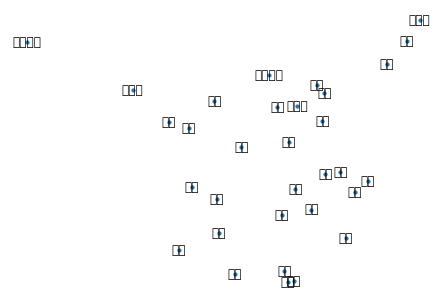

In [158]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

print('city_info',city_info)
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))

nx.draw(city_graph, city_info, with_labels=True, node_size=10)

In [87]:
threshold = 700
from collections import defaultdict
def build_connection(city_info):
    citys_connection = defaultdict(list)
    citys = list(city_info.keys())
    for c1 in citys:
        for c2 in citys:
            if c1 == c2:
                continue
            if get_city_distance(c1, c2) < threshold:
                citys_connection[c1].append(c2)
    return citys_connection
    
city_connection = build_connection(city_info)    
city_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

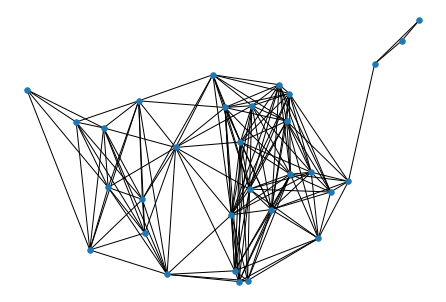

In [90]:
city_connection_graph = nx.Graph(city_connection)
nx.draw(city_connection_graph, city_info,whth_lables=True,node_size=30)

In [111]:
def search_1(graph,start,destination):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
      
        froniter = path[-1]
        if froniter in visited: continue
        successsors = graph[froniter]
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
            
        visited.add(froniter)
       
search_1(city_connection,"上海","香港")

['上海', '合肥', '香港']

In [ ]:
# def seatch_2(graph, start, destination, seatch_strayrgy):
    

In [161]:
def get_distance_of_path(path):
    distance = 0
    for i, _ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    print('distance',distance)
    return distance

get_distance_of_path(search_1(city_connection,"上海","香港"))

distance 1045.1004188056104


1045.1004188056104

In [121]:
def sort_by_distance(path):
    return sorted(path, key=get_distance_of_path)

In [129]:
def search_2(graph, start, destination, search_strategy):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
      
        froniter = path[-1]
        if froniter in visited: continue
        successsors = graph[froniter]
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
        pathes = search_strategy(pathes)
        visited.add(froniter)   
        
search_2(city_connection,"北京","上海",search_strategy=lambda x:x)
search_2(city_connection,"北京","上海",search_strategy=sort_by_distance)

new_path ['北京', '济南', '上海']
new_path ['北京', '天津', '上海']


['北京', '天津', '上海']

In [ ]:
# part2

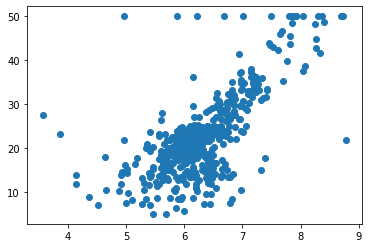

In [149]:
from sklearn.datasets import load_boston
import random
dataset = load_boston()
x,y = dataset['data'],dataset['target']
x.shape
# y.shape
# x[1].shape
# dataset.feature_names
X_rm = x[:,5]
X_rm.shape
# print(X_rm)
# print(y)
plt.scatter(X_rm, y)

In [153]:
# 方差
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

#define target function
def price(rm, k, b):
    return k * rm + b

Iteration 0, the loss is 310053.2696223664, parameters k is -71.95735034850881 and b is -79.11189041511173
Iteration 1, the loss is 261323.88179248892, parameters k is -64.91573002385262 and b is -78.00414974478737
Iteration 2, the loss is 220254.39534088853, parameters k is -58.45121247114297 and b is -76.98713257427367
Iteration 3, the loss is 185640.73009294743, parameters k is -52.51650146217807 and b is -76.0534036967198
Iteration 4, the loss is 156468.07842408578, parameters k is -47.068176912313156 and b is -75.19613725469291
Iteration 5, the loss is 131881.1530065881, parameters k is -42.06637721265809 and b is -74.40906680118914
Iteration 6, the loss is 111159.11139186387, parameters k is -37.47450759661325 and b is -73.68643945337458
Iteration 7, the loss is 93694.42226400024, parameters k is -33.258972407109944 and b is -73.02297380363811
Iteration 8, the loss is 78975.0537628642, parameters k is -29.388929305782504 and b is -72.4138212800272
Iteration 9, the loss is 66569.4

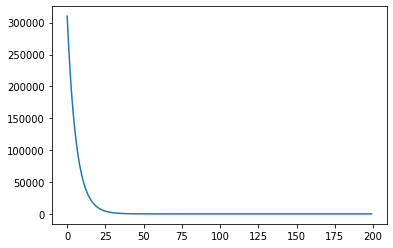

In [155]:
k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b


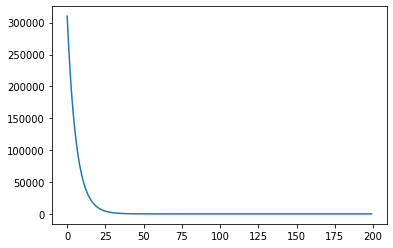

In [156]:
plt.plot(list(range(iteration_num)),losses)

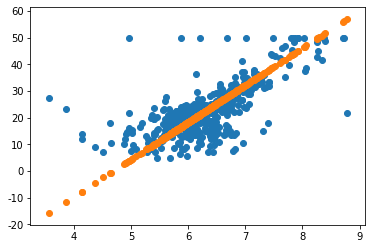

In [157]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)